In [1]:
import pandas as pd

df = pd.read_csv("housing.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

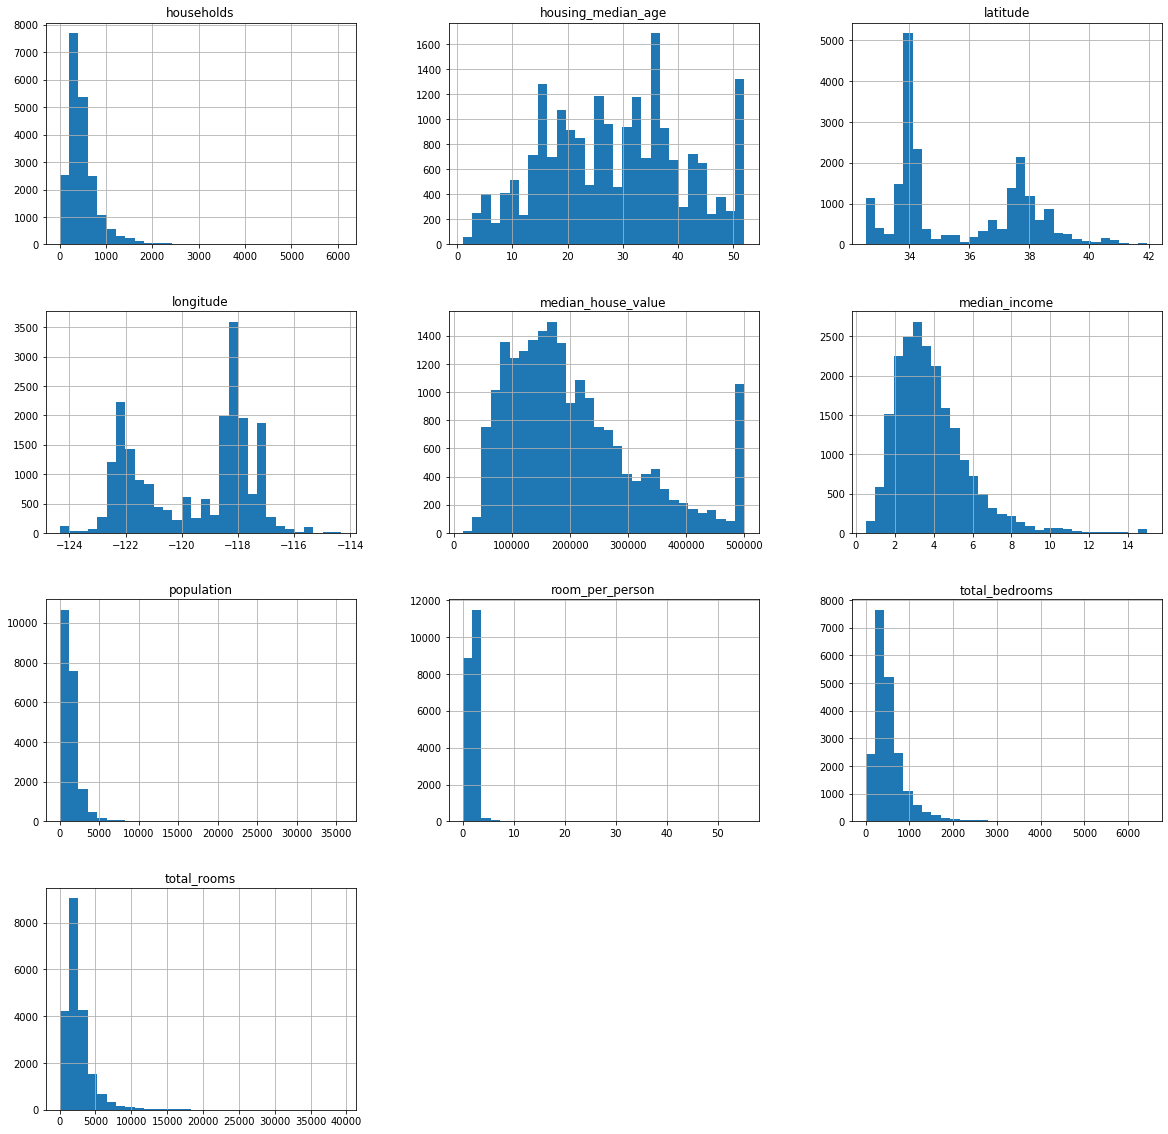

In [16]:

import matplotlib.pyplot as plt
df.hist(bins=30,figsize=(20,20))
plt.show()

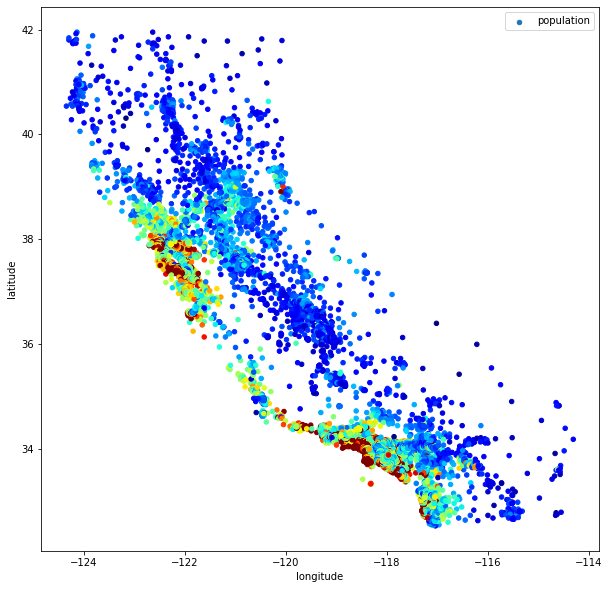

In [6]:
df.plot(kind="scatter",x="longitude" ,y="latitude",
        figsize=(10,10),
        cmap=plt.get_cmap("jet"),
        colorbar= False ,
        alpha=1,c="median_house_value",label="population")

In [7]:
x = df.corr()
x["total_bedrooms"].sort_values()

housing_median_age   -0.320451
latitude             -0.066983
median_income        -0.007723
median_house_value    0.049686
longitude             0.069608
population            0.877747
total_rooms           0.930380
households            0.979728
total_bedrooms        1.000000
Name: total_bedrooms, dtype: float64

In [8]:
room_per_person = df["total_rooms"]/df["population"]
df["room_per_person"]=room_per_person
c=  df.corr()
c["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
room_per_person       0.209482
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [9]:
housing = df.drop([1,3,4,54,5],axis=0)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_person
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.732919
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.957661
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,2.317185
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,2.682800
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2.118574


In [10]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")
housing= housing.drop("ocean_proximity",axis=1)
housing.head()
imputer.fit(housing)
x=imputer.transform(housing)


In [11]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53470000e+00,
        1.79700000e+05,  1.93793103e+00])

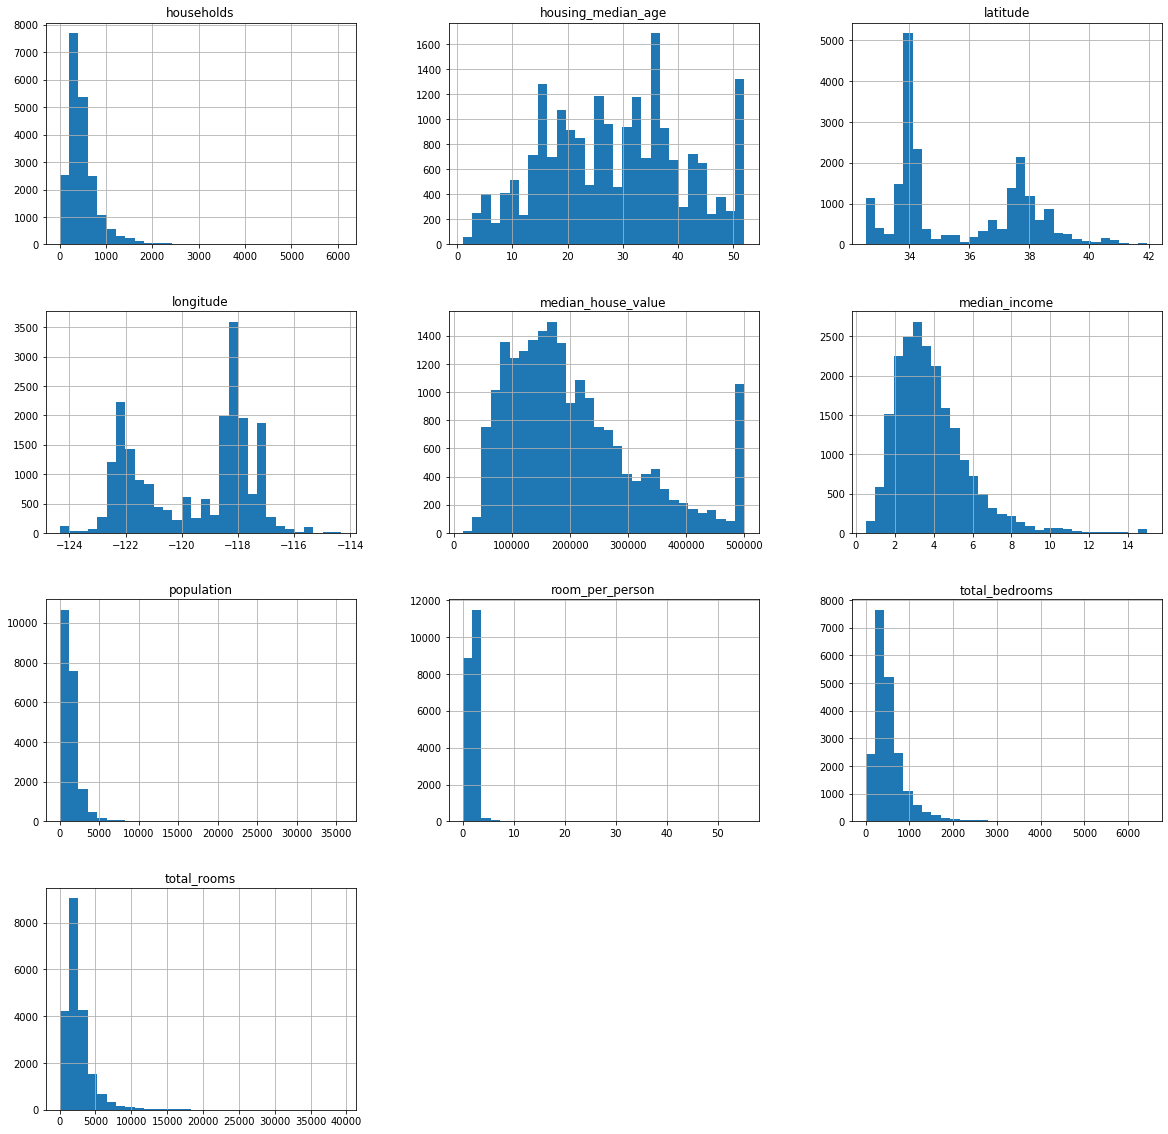

In [12]:
housing_tr =pd.DataFrame(x,columns=housing.columns)
df.hist(bins=30,figsize=(20,20))
plt.show()

In [13]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_person
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2.732919
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2.957661
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,2.317185
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,2.682800
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,2.118574


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = encoder.fit(df["ocean_proximity"])
encoded = encoder.fit_transform(df["ocean_proximity"])
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

# this is a simple mark down
### I am kind of triying it out

*itelic text* and **bold text** 
    * now this is list
    * another item
    * soo cool
        *new item
        
        
1. now this is list
    ### 1. *another item*
    ### 2. soo cool
    ### 3. new item        
    
# now i  will show images
![image](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

I think you should use an
`<addr>` element here instead.

## some task
- [ ] need to learn how to visualize all type of data 
- [ ] learn different algorithm and why its usefull
    - [ ] Decision tree
- [ ] track prograss

## some task
- [ ] need to learn how to visualize all type of data 
- [ ] learn different algorithm and why its usefull
    - [ ] Decision tree
- [ ] track prograss

# why emoji is not working !
@octocat :+1: This PR looks great - it's ready to merge! :shipit:

